# Check mass balance - Classical

Niccolò Tubini, 16 July 2021

In [74]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from gf.io import gf_io

In [75]:
in_rain_5min= gf_io.read_OMS_timeseries('snowrainsep_precip_10_5min_1_impulso.csv',-9999)
in_rain_5min.index = pd.to_datetime(in_rain_5min.index)

in_snow_5min= gf_io.read_OMS_timeseries('snowrainsep_snow_10_5min_1_impulso.csv',-9999)
in_snow_5min.index = pd.to_datetime(in_snow_5min.index)

in_rain = gf_io.read_OMS_timeseries('snowrainsep_precip_10_1_impulso.csv',-9999)
in_rain.index = pd.to_datetime(in_rain.index)

in_snow = gf_io.read_OMS_timeseries('snowrainsep_snow_10_1_impulso.csv',-9999)
in_snow.index = pd.to_datetime(in_snow.index)

In [110]:
swe_5min = gf_io.read_OMS_timeseries('SWEClassical_1_impulso_5min_new.csv',-9999)
swe_5min.index = pd.to_datetime(swe_5min.index)

melting_5min = gf_io.read_OMS_timeseries('MeltingClassical_1_impulso_5min_new.csv',-9999)
melting_5min.index = pd.to_datetime(melting_5min.index)

swe = gf_io.read_OMS_timeseries('SWEClassical_1_impulso_hourly_new.csv',-9999)
swe.index = pd.to_datetime(swe.index)

melting = gf_io.read_OMS_timeseries('MeltingClassical_1_impulso_hourly_new.csv',-9999)
melting.index = pd.to_datetime(melting.index)

In [111]:
melting_5min

,10
Datetime,
2013-11-01 00:00:00,0.0
2013-11-01 00:05:00,0.0
2013-11-01 00:10:00,0.0
2013-11-01 00:15:00,0.0
2013-11-01 00:20:00,0.0
...,...
2013-11-10 23:40:00,0.0
2013-11-10 23:45:00,0.0
2013-11-10 23:50:00,0.0


## Mass Balance hourly

In [112]:
tStart = '2013-10-01 00:00'
tEnd = '2014-10-01 00:00'
in_rain[tStart:tEnd]['10'].sum()+in_snow[tStart:tEnd]['10'].sum() - melting[tStart:tEnd]['10'].sum() - swe.iloc[-1]['10']

0.0

## Mass Balance 5 minutes

In [113]:
in_rain_5min['10'].sum()+in_snow_5min['10'].sum() - melting_5min['10'].sum()  -swe_5min.iloc[-1]['10']

-1.2434497875801753e-14

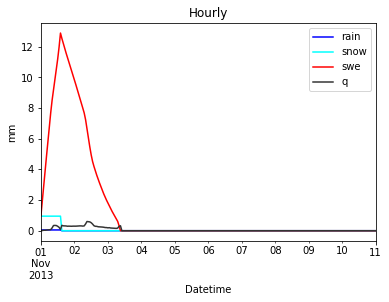

In [114]:
tStart = '2013-11-01 00:00'
tEnd = '2013-11-11 00:00'
in_rain[tStart:tEnd]['10'].plot(color='blue')
in_snow[tStart:tEnd]['10'].plot(color='cyan')
swe[tStart:tEnd]['10'].plot(color='red')
melting[tStart:tEnd]['10'].plot(color='0.2')
plt.legend(['rain', 'snow', 'swe', 'q'])
plt.ylabel("mm")
plt.title('Hourly')
plt.show()

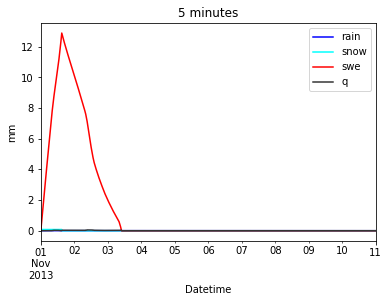

In [115]:
tStart = '2013-11-01 00:00'
tEnd = '2013-11-11 00:00'
in_rain_5min[tStart:tEnd]['10'].plot(color='blue')
in_snow_5min[tStart:tEnd]['10'].plot(color='cyan')
swe_5min[tStart:tEnd]['10'].plot(color='red')
melting_5min[tStart:tEnd]['10'].plot(color='0.2')
plt.legend(['rain', 'snow', 'swe', 'q'])
plt.ylabel("mm")
plt.title('5 minutes')
plt.show()

## Resample 5 min to hourly

In [116]:
melting_resampled = melting_5min.resample('1h').sum()


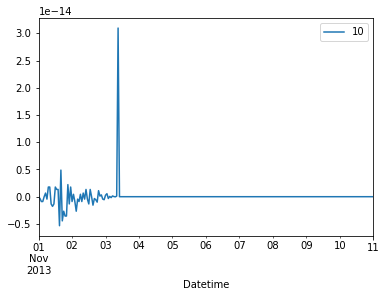

In [117]:
(melting_resampled- melting).plot()

In [84]:
print('hourly\t\t\t5min')
print(swe.loc['2013-11-01 00:00']['10'], swe_5min.loc['2013-11-01 00:55']['10'])
print(swe.loc['2013-11-01 01:00']['10'], swe_5min.loc['2013-11-01 01:55']['10'])
print(swe.loc['2013-11-01 02:00']['10'], swe_5min.loc['2013-11-01 02:55']['10'])
print(swe.loc['2013-11-01 03:00']['10'], swe_5min.loc['2013-11-01 03:55']['10'])
print(swe.loc['2013-11-01 04:00']['10'], swe_5min.loc['2013-11-01 04:55']['10'])

hourly			5min
0.9999999999999998 0.4683008320453416
1.9887457827456307 0.9185063118039649
2.9572728631565157 1.3519136567440164
3.9271377429060776 1.786658801022745
4.883624629268869 2.208025951914703


In [85]:
errorMi = gf_io.read_OMS_timeseries('errorSolidWater_hourly.csv',-9999)
errorMi = gf_io.read_OMS_timeseries('errorSolidWater_5min.csv',-9999)

errorMi.index = pd.to_datetime(errorMi.index)

errorMw = gf_io.read_OMS_timeseries('errorLiquidWater_hourly.csv',-9999)
errorMi = gf_io.read_OMS_timeseries('errorSolidWater_5min.csv',-9999)

errorMw.index = pd.to_datetime(errorMw.index)

errorSWE = gf_io.read_OMS_timeseries('errorSWE_hourly.csv',-9999)
errorSWE = gf_io.read_OMS_timeseries('errorSWE_5min.csv',-9999)
errorSWE.index = pd.to_datetime(errorSWE.index)

In [86]:
errorMw['10'].max()

2.220446049250313e-16

In [87]:
errorMw['10'].min()

-2.220446049250313e-16

In [88]:
errorSWE['10'].max()

7.355227538141662e-16

In [89]:
errorSWE['10'].min()

-5.967448757360216e-16

In [68]:
errorMi['10'].min()

-1.8735013540549517e-16

In [69]:
errorMi['10'].max()

1.8735013540549517e-16